In [1]:
#-----------------------------------------
# importamos los paquetes que vamos a usar
#-----------------------------------------

import pypulse as pulsar

import matplotlib.mlab as mlab
import matplotlib as mpl
import matplotlib.pyplot as plt     # para graficar
from matplotlib import pyplot


import decimal
import numpy as np
import glob                         # para hacer listas de archivo
import subprocess                   # para usar subprocesos

import pandas as pd

import os
import shutil

Numero de observaciones = 62
Loading: prepfold_timing_A1_20200501_130000_PSR_0437-4715.fits
Load time: 1.61 s
Loading: prepfold_timing_A1_20200423_133121_PSR_0437-4715.fits
Load time: 1.55 s
Loading: prepfold_timing_A1_20200308_163156_PSR_0437-4715.fits
Load time: 1.56 s
Loading: prepfold_timing_A1_20200107_203210_PSR_0437-4715.fits
Load time: 0.78 s
Loading: prepfold_timing_A1_20200517_115645_PSR_0437-4715.fits
Load time: 1.54 s
Loading: prepfold_timing_A1_20200418_135122_PSR_0437-4715.fits
Load time: 1.55 s
Loading: prepfold_timing_A1_20200305_202204_PSR_0437-4715.fits
Load time: 1.55 s
Loading: prepfold_timing_A1_20200511_125627_PSR_0437-4715.fits
Load time: 1.55 s
Loading: prepfold_timing_A1_20200504_124816_PSR_0437-4715.fits
Load time: 1.58 s
Loading: prepfold_timing_A1_20200111_201615_PSR_0437-4715.fits
Load time: 0.77 s
Loading: prepfold_timing_A1_20200416_140040_PSR_0437-4715.fits
Load time: 1.59 s
Loading: prepfold_timing_A1_20200417_135502_PSR_0437-4715.fits
Load time: 1.59 s

Load time: 16.28 s
Loading: prepfold_timing_20200422_133609_PSR_0437-4715.fits
Load time: 15.79 s
Loading: prepfold_timing_20200418_135122_PSR_0437-4715.fits
Load time: 16.50 s
Loading: prepfold_timing_20200113_200823_PSR_0437-4715.fits
Load time: 12.29 s
Loading: prepfold_timing_20200310_162413_PSR_0437-4715.fits
Load time: 17.97 s
Loading: prepfold_timing_20200305_182046_PSR_0437-4715.fits
Load time: 15.18 s
Loading: prepfold_timing_20200308_163156_PSR_0437-4715.fits
Load time: 26.86 s
Loading: prepfold_20200103_204749_PSR_0437-4715.fits
Load time: 7.72 s
Loading: prepfold_timing_A1_20200514_120846_PSR_0437-4715.fits
Load time: 11.15 s
Loading: prepfold_timing_A1_20200430_130356_PSR_0437-4715.fits
Load time: 20.30 s
Loading: prepfold_timing_20200417_135502_PSR_0437-4715.fits
Load time: 12.19 s
Loading: prepfold_timing_20200312_161615_PSR_0437-4715.fits
Load time: 16.10 s
Loading: prepfold_timing_20200313_161243_PSR_0437-4715.fits
Load time: 20.42 s
Loading: prepfold_timing_A1_2020051

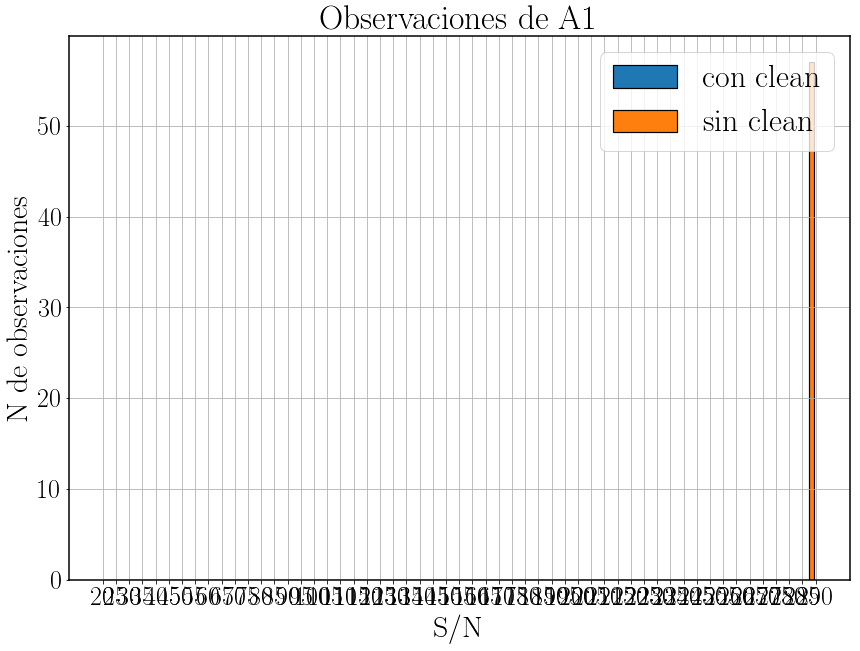

Numero de observaciones = 33
Loading: prepfold_timing_A2_20200518_115306_PSR_0437-4715.fits
Load time: 2.72 s
Loading: prepfold_timing_A2_20200504_124809_PSR_0437-4715.fits
Load time: 1.78 s
Loading: prepfold_timing_A2_20200519_114911_PSR_0437-4715.fits
Load time: 2.64 s
Loading: prepfold_timing_A2_20200502_125545_PSR_0437-4715.fits
Load time: 3.73 s
Loading: prepfold_timing_A2_20200514_120851_PSR_0437-4715.fits
Load time: 0.75 s
Loading: prepfold_timing_A2_20200508_135046_PSR_0437-4715.fits
Load time: 1.55 s
Loading: prepfold_timing_A2_20200518_141925_PSR_0437-4715.fits
Load time: 1.39 s
Loading: prepfold_timing_A2_20200514_134956_PSR_0437-4715.fits
Load time: 0.93 s
Loading: prepfold_timing_A2_20200509_135913_PSR_0437-4715.fits
Load time: 2.45 s
Loading: prepfold_timing_A2_20200518_125003_PSR_0437-4715.fits
Load time: 1.54 s
Loading: prepfold_timing_A2_20200506_145446_PSR_0437-4715.fits
Load time: 1.00 s
Loading: prepfold_timing_A2_20200511_122038_PSR_0437-4715.fits
Load time: 0.74 s

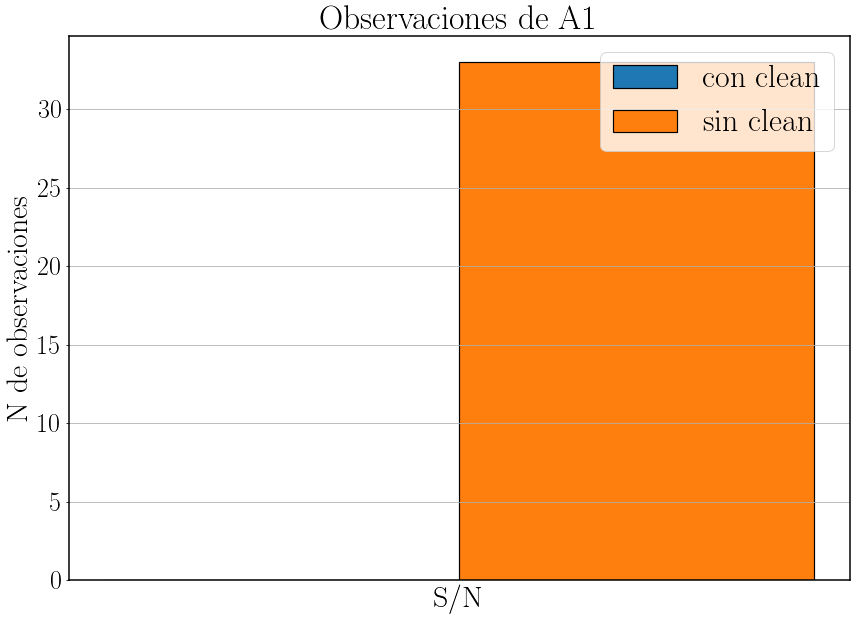

In [2]:
for ant in ["A1","A2"]:
    
    k = 0    
    for clean in ["con","sin"]:

# creamos una lista con todos los archivos .pfd de observaciones

        os.chdir('./' + ant + '_pfds_'+ clean + 'clean/')                         # entramos al directorio que contiene los .pfds
        pfd_files = glob.glob('*pfd')                           # lista de archivos .pfd
        print("Numero de observaciones = " + str(len(pfd_files)))
        
# creamos un array para guardar los datos de s/n:

        sn = np.full((len(pfd_files),2), -1)  # cada fila se corresponde a una observación, y cada columna a con/sin clean

# Convert PFD files to PSRFITS

        for pfd in pfd_files:
            subprocess.check_call(['psrconv','-o','PSRFITS','-e','fits',pfd])
    
# Save all PSRFITS files
        psrfits_files = glob.glob('*fits')

# Load all PSRFITS into PyPulse
        fits_pypulse= []
        for psrfits in psrfits_files:
            temp_pypulse= pulsar.Archive(psrfits)
            fits_pypulse.append(temp_pypulse)

        observations = dict(zip(psrfits_files, fits_pypulse))

# Create single pulse object
# Creat array of best profiles

        single_pulses=[]

        for observation in fits_pypulse:
    
    # First crunch in time and frequency
            observation.fscrunch()
            observation.tscrunch()
    
    # Now get array of the best profile
            tmp_singlepulse = observation.getSinglePulses(windowsize=256)
    
    # Align and normalize
            tmp_singlepulse.center_align()
            tmp_singlepulse.normalize()
    
    # Save aligned and normalize in each observation
            single_pulses.append(tmp_singlepulse)
    
# Save single pulse object
        sp_observations = dict(zip(psrfits_files, single_pulses))

        os.chdir('..')                                 # salimos del directorio que contiene los .pfds
        
# guardamos los datos

        files = []                                                                   # listado de observaciones
        list = open("./results_" + ant + '_pfds_'+ clean + 'clean.txt', "w+")        # archivo que contendrá S/N y t_obs
    
        n=0
        for key in observations:
            time = (observations[key].getDuration())/60                        # calculamos el tiempo de integración en minutos
            sn[n,k] = sp_observations[key].getSN()                             # guardamos el S/N en un array para después graficar
            sn_obs = sp_observations[key].getSN()                              # calculamos el S/N de la observación
            file = key.replace(".fits", ".pfd")
            list.write(file + "   " + str(sn_obs) + "   " + str(time) + "\n")  # y escribimos el S/N y el t_obs en el archivo de salida
            n += 1
        
        list.close()                                                       # cerramos el archivo de salida
        
        k += 1
        
#------------------------------------
# Graficamos
#------------------------------------
        
    plt.close()

# Set the fonts. Always use big fonts.
    nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 30,
        "font.size": 28,
        "axes.linewidth": 1.5,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 32,
        "xtick.labelsize": 13,
        "ytick.labelsize": 26,
}
# Update the fonts
    mpl.rcParams.update(nice_fonts)


    plt.figure(figsize=(14,10))
    plt.grid()
    
    bineado = np.arange(20, np.amax(sn)+10 , 10)
    plt.xticks(bineado)
    bins = bineado

    plt.hist([sn[:,0],sn[:,1]], bins, edgecolor='black', linewidth=1.2, label=['con clean','sin clean'])
    plt.legend(loc='upper right')

    plt.xlabel('S/N')
    plt.ylabel('N de observaciones')
    plt.title("Observaciones de A1")
    plt.savefig('histograma_' + ant + '.pdf', bbox_inches='tight')
    plt.savefig('histograma_' + ant + '.png', bbox_inches='tight')
    plt.show()

plt.close()
